<a href="https://colab.research.google.com/github/Gabrielasants7/Portfolio-Ciencia-de-Dados/blob/main/An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IBM Global Business Services Brasil
Desafio Advanced Analytics
Análise Exploratória, Modelagem e Otimização

ESCOPO DO PROJETO:
* Breve descrição do conjunto de dados e um resumo de seus atributos
* Problema

* Objetivo

*  Como é feito o bombom industrial ?


* iniciando a exploração de dados
* Principais Descobertas e Insights, que sintetiza os resultados da Análise Exploratória de Dados 
* Análise descritiva
* Análise diagnóstica 
* Pré-Preparação dos dados 
* 



---
# Breve descrição do conjunto de dados e um resumo de seus atributos


---



 ▪ Sobre o conjunto de Dados
 
O conjunto de dados contém dados de um processo industrial que transforma chocolate em bombons, são quatro variavéis sendo elas : 


---



(Var_1 ) 

(Var_2) variavél categórica ordinal  A  , B  , C  .

(QTD_CHOC) Representa a quantidade de chocolate inserida no produto final ( o bombom)

(PESO_BOMBOM ) Representa o peso do produto , a variavél alvo .



---

# Definição da temática ( BOMBOM)

▪ Bombom é o produto constituído por massa de chocolate ou por um núcleo formado de recheio, recoberto por uma camada de chocolate ou glacê. Podendo conter outros ingredientes, desde que não descaracterizem o produto, e apresentar formato e consistência variados.

#Objetivo


---

O objetivo dessa análise é  identificar pontos de melhora no processo, além de obter um plano plausível de produção (valores ótimos da quantidade de chocolate QTD CHOC) visando a minimização da métrica de custo. 

# Problema


---
▪ Contextualização do problema


---




O grande problema enfrentado pelo cliente é a variabilidade no processo. Nas palavras do gerente da qualidade:

* "Estamos tendo dificuldade para modelar nosso processo industrial. As diferentes variáveis de processo impactam de maneira diferente o peso final dos bombons, além de introduzir diferentes níveis de incerteza no processo. Não estamos conseguindo lidar com esta incerteza." 

# Importando as bibliotecas necessárias 

In [ ]:
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import math
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
from scipy import stats
from scipy.stats import norm, skew 



<ipython-input-105-c831029e5723>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
#Carregando o conjunto de dados 
df = pd.read_excel('/content/drive/MyDrive/registros-prod.xlsx')
df_2 = pd.read_excel('/content/drive/MyDrive/analise-preditiva.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/analise-prescritiva.xlsx')
#Visualizando
display(df)

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822
...,...,...,...,...
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321


O dataframe é composto por ;  (1 variável categórica ordinal) ,  representada pela coluna VAR_2. 

E 3 variáveis númericas  contínuas (QTD_CHOC,VAR_1 e PESO_BOMBOM)

In [ ]:
#visualizando ás 5 última linhas do dataset 
df.tail(5)

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
495,301.01,1.59,A,10.471494
496,331.41,2.60,A,12.048504
497,311.08,0.38,C,6.128060
498,315.56,1.89,B,9.198321
499,309.30,2.91,A,12.686713


# Análise exploratória 

Essa etapa tem como premissa , criar uma conceitualização inicial e permitir um entendimento de como os dados estão estruturados.

In [ ]:
#Visualizando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


O dataset é composto por ; 4 colunas e 500 linhas .  Os tipos das variáveis são , (3) do tipo **float** e (1) do tipo **objeto** 

In [ ]:
df.isnull().sum()

QTD_CHOC       0
VAR_1          0
VAR_2          0
PESO_BOMBOM    0
dtype: int64

O dataset não tem valores nulos 

In [ ]:
df.duplicated().sum()

0

O dataset não tem valores duplicados 

# Qual é o valor máximo das colunas?

In [ ]:
df.apply(np.max)

QTD_CHOC          436.07
VAR_1               2.98
VAR_2                  C
PESO_BOMBOM    17.362728
dtype: object

▪ Caso a observar o peso máximo dos bombons é de 17,362 gramas , sendo que o peso ideal é de 10 gramas , esse peso extrapola muito do peso ideal .

# QUAL É A VARIÂNCIA DESSE CONJUNTO DE DADOS?

In [ ]:
variância=df.var() 
print(variância) 


QTD_CHOC       2041.458237
VAR_1             0.505756
PESO_BOMBOM       2.471916
dtype: float64


<ipython-input-112-5d0dddeed02e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variância=df.var()


# Detecção de valores discrepantes

Um outlier é um ponto ou conjunto de pontos que são diferentes de outros pontos. 

In [ ]:
# identificando os outliers para a variável price
#cálculo do IQR
q3, q1 = np.percentile(df['PESO_BOMBOM'], [75 ,25])
IQR = q3 - q1
#limite inferior é -1.5 vezes o valor do IQR
min = q1 - (IQR*1.5)
#limite superior é +1.5 vezes o valor do IQR
max = q3 + (IQR*1.5)
print('IQR da variável PESO_BOMBOM: ', IQR)
print('Limite inferior de PESO_BOMBOM: ', min)
print('Limite superior de PESO_BOMBOM: ', max)

IQR da variável PESO_BOMBOM:  1.9541126360148056
Limite inferior de PESO_BOMBOM:  6.494650275727711
Limite superior de PESO_BOMBOM:  14.311100819786933


<Axes: xlabel='PESO_BOMBOM'>

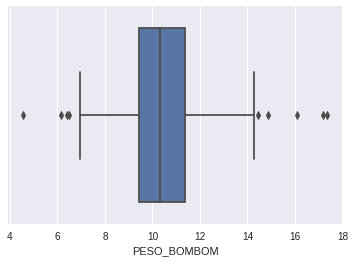

In [ ]:
sns.boxplot(x=df['PESO_BOMBOM'])

<Axes: xlabel='VAR_1'>

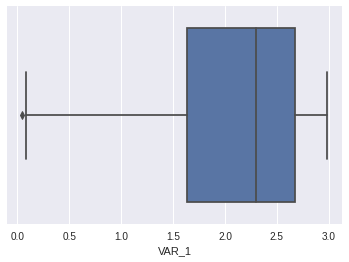

In [ ]:
sns.boxplot(x=df['VAR_1'])

<Axes: xlabel='QTD_CHOC'>

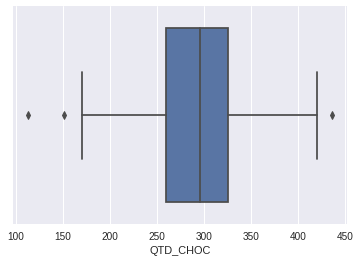

In [ ]:
sns.boxplot(x=df['QTD_CHOC'])

# Remoção de valores discrepantes 

<Axes: xlabel='QTD_CHOC'>

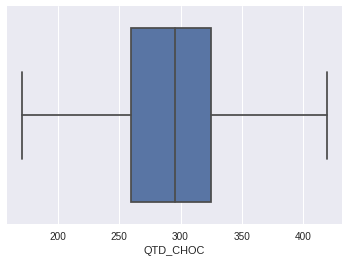

In [ ]:
sns.boxplot(x=df['QTD_CHOC'], data = df, showfliers=False)


<Axes: xlabel='PESO_BOMBOM'>

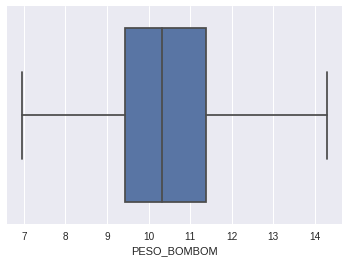

In [ ]:
sns.boxplot(x=df['PESO_BOMBOM'], data = df, showfliers=False)

<Axes: xlabel='VAR_1'>

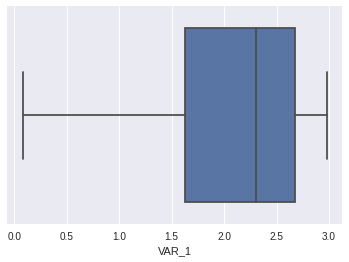

In [ ]:
sns.boxplot(x=df['VAR_1'], data = df, showfliers=False)

*Outliers removidos com sucesso*

# VAR_2 ❌ QTD_CHOC

<Axes: xlabel='VAR_2', ylabel='QTD_CHOC'>

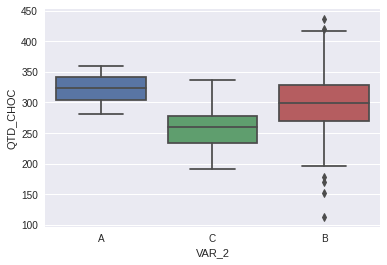

In [ ]:
sns.boxplot(x='VAR_2', y='QTD_CHOC', data = df)
     



---

Baseado no boxplot acima é possível afirmar que , o primeiro quartil está em 260 , mediana 296 , tereceiro quartil 325, mínimo 171, máximo 417

---



TEMOS ALGUNS OUTLIERS NO BLOXPLOT ACIMA VARIAVÉL CATEGORIA (B ), IREI REMOVER ABAIXO .

<Axes: xlabel='VAR_2', ylabel='QTD_CHOC'>

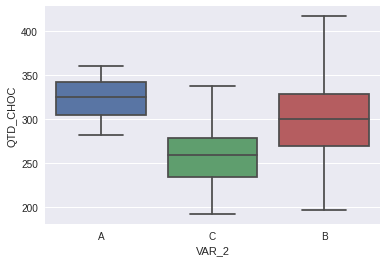

In [ ]:
sns.boxplot(x='VAR_2', y='QTD_CHOC', data = df, showfliers=False)

*REMOVIDO*

---

# PESO DO BOMBOM X       VAR_2

<Axes: xlabel='VAR_2', ylabel='PESO_BOMBOM'>

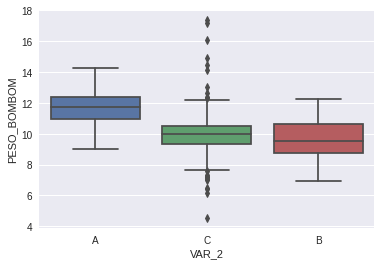

In [ ]:
sns.boxplot(x='VAR_2', y='PESO_BOMBOM', data = df)

*Temos muitos outliers na VAR_2 categoria C, irei fazer a remoção logo abaixo*

<Axes: xlabel='VAR_2', ylabel='PESO_BOMBOM'>

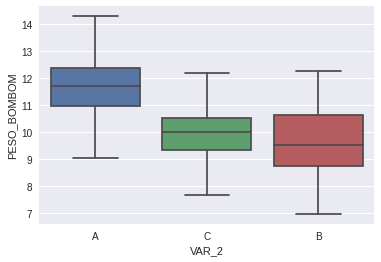

In [ ]:
sns.boxplot(x='VAR_2', y='PESO_BOMBOM', data = df, showfliers=False)

# Como se comporta a variavél 1 (VAR_1) com a variavél (VAR_2)?

<Axes: xlabel='VAR_2', ylabel='VAR_1'>

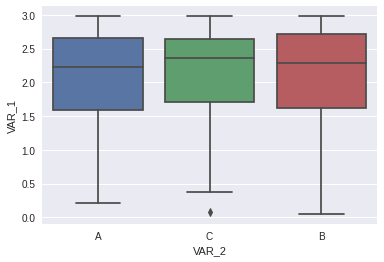

In [ ]:
sns.boxplot(x='VAR_2', y='VAR_1', data = df)

TEMOS ALGUNS OUTLIERS NO BLOXPLOT ACIMA VARIAVÉL CATEGORIA (C ), IREI REMOVER ABAIXO .

<Axes: xlabel='VAR_2', ylabel='VAR_1'>

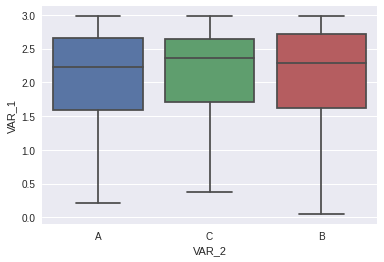

In [ ]:
sns.boxplot(x='VAR_2', y='VAR_1', data = df, showfliers=False)

#Análise Descritiva 

**Definição da temática**

Essa análise tem como premissa entender o que está acontecendo no negócio atualmente . Tem como principal objetivo ,  resumir , sumarizar e explorar o comportamento dos dados . 

Os passos dessa análise será :

Estatística Descritiva

Organizar os dados usando distribuições de frequência 

Apresentar os dados. usando técnicas de visualização 


Calcular média de tendência central, variação e associação 


Iniciarei a análise descritiva através da biblioteca researchpy

# Estatística descritiva

O objetivo da estatística descritiva é descrever , ou seja , resumir ou representar através da estatística ,  os dados disponíveis quando eles são numericos .



In [ ]:
import researchpy as rp

In [ ]:
rp.codebook(df)

Variable: QTD_CHOC    Data Type: float64 

 Number of Obs.: 500 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 494 

 Range: [112.91, 436.07] 
 Mean: 291.26 
 Standard Deviation: 45.18 
 Mode: 279.79 
 10th Percentile: 231.642 
 25th Percentile: 259.2675 
 50th Percentile: 295.45000000000005 
 75th Percentile: 325.13750000000005 
 90th Percentile: 345.678 





Variable: VAR_1    Data Type: float64 

 Number of Obs.: 500 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 208 

 Range: [0.05, 2.98] 
 Mean: 2.1 
 Standard Deviation: 0.71 
 Mode: 2.5 
 10th Percentile: 0.98 
 25th Percentile: 1.63 
 50th Percentile: 2.3 
 75th Percentile: 2.6725 
 90th Percentile: 2.861 





Variable: VAR_2    Data Type: object 

 Number of Obs.: 500 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 3 

 Data Values and Counts: 
 
 Values  Frequency
     A        158
     B        165
     C        177




Variable: PES

In [ ]:
stats_df = df.describe()
stats_df = df.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range','std','count','min','max',]
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,QTD_CHOC,VAR_1,PESO_BOMBOM
mean,291.264600,2.098180,10.395002
25%,259.267500,1.630000,9.425819
median,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
range,323.160000,2.930000,12.819604
std,45.182499,0.711166,1.572233
count,500.000000,500.000000,500.000000
min,112.910000,0.050000,4.543124
max,436.070000,2.980000,17.362728


Utilizando o metódo describe com o mesmo intuito , porém com menos linhas de código 

In [ ]:
#Estatística descritiva 
df.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


# Análise minuciosa da variavél VAR_2

In [ ]:
categoria = df.VAR_2.value_counts()
categoria

C    177
B    165
A    158
Name: VAR_2, dtype: int64

A variavél 2 é constituída por três categorias sendo elas:

A :   158

B  :  165

C  :
  177


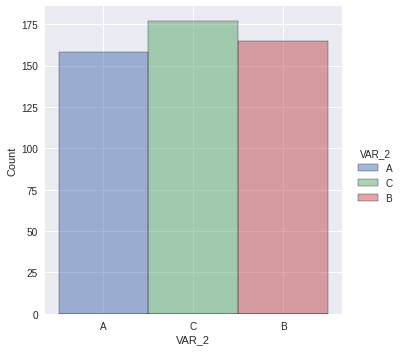

In [ ]:
sns.displot(df, x="VAR_2", hue="VAR_2")

Como visto acima o gráfico confirma que A variavél 2 é constituída por três categorias sendo elas:

A : 158

B : 165

C : 177

# VAR_2 ❌ PESO_BOMBOM

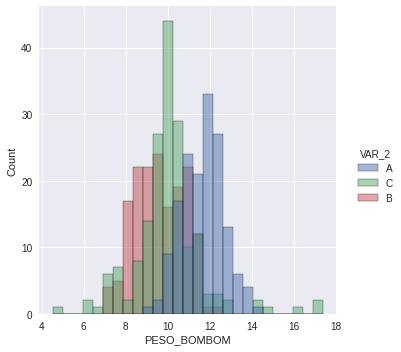

In [ ]:
sns.displot(df, x="PESO_BOMBOM", hue="VAR_2")

A variável (C) é constituída  por  bombons do peso ideal (10), enquanto a variavél  categoria da  (A ) é constituída por bombons com excesso de peso e a variavél categoria  (B) possui bombons de baixo peso.
 em média os pesos são entre 8,9 , e consequetemente, o descarte dos bomboms.
  É válido destacar que a variável A contribui para o peso ideal e também para o peso minímo ilustrada nesse gráfico chegando a 7,8 . 

# Quantidade de chocolate ❌ VAR_2

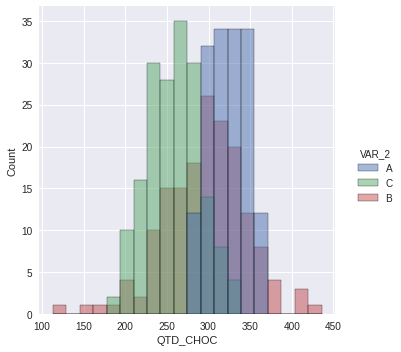

In [ ]:
sns.displot(df, x="QTD_CHOC", hue="VAR_2")

A variável categoria (C )tem uma frequência de chocolate em 250,
a variável B que é composta pelos bombons menores
utilizam mais chocolates chegando a 380 , e a variável
(A) também utiliza mais chocolate que a variavél C.

# VAR_1  ❌  VAR_2

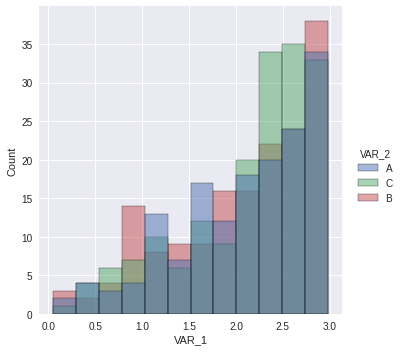

In [ ]:
sns.displot(df, x="VAR_1", hue="VAR_2")

A variável B que é composta por bombons abaixo do
peso é a variável que atinge o limite da VAR_1 ,
chegando a 2.9.



---
#COMO ESTÁ A DISTRIBUIÇÃO DA VARIAVÉL DE ENTRADA ?


<ipython-input-135-4d959b017f0c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['QTD_CHOC'])


<Axes: xlabel='QTD_CHOC', ylabel='Density'>

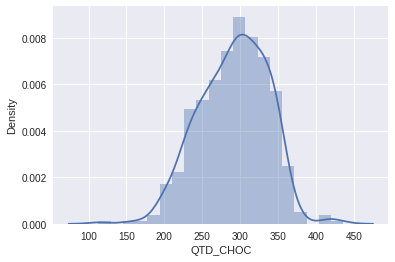

In [ ]:
sns.distplot(df['QTD_CHOC'])

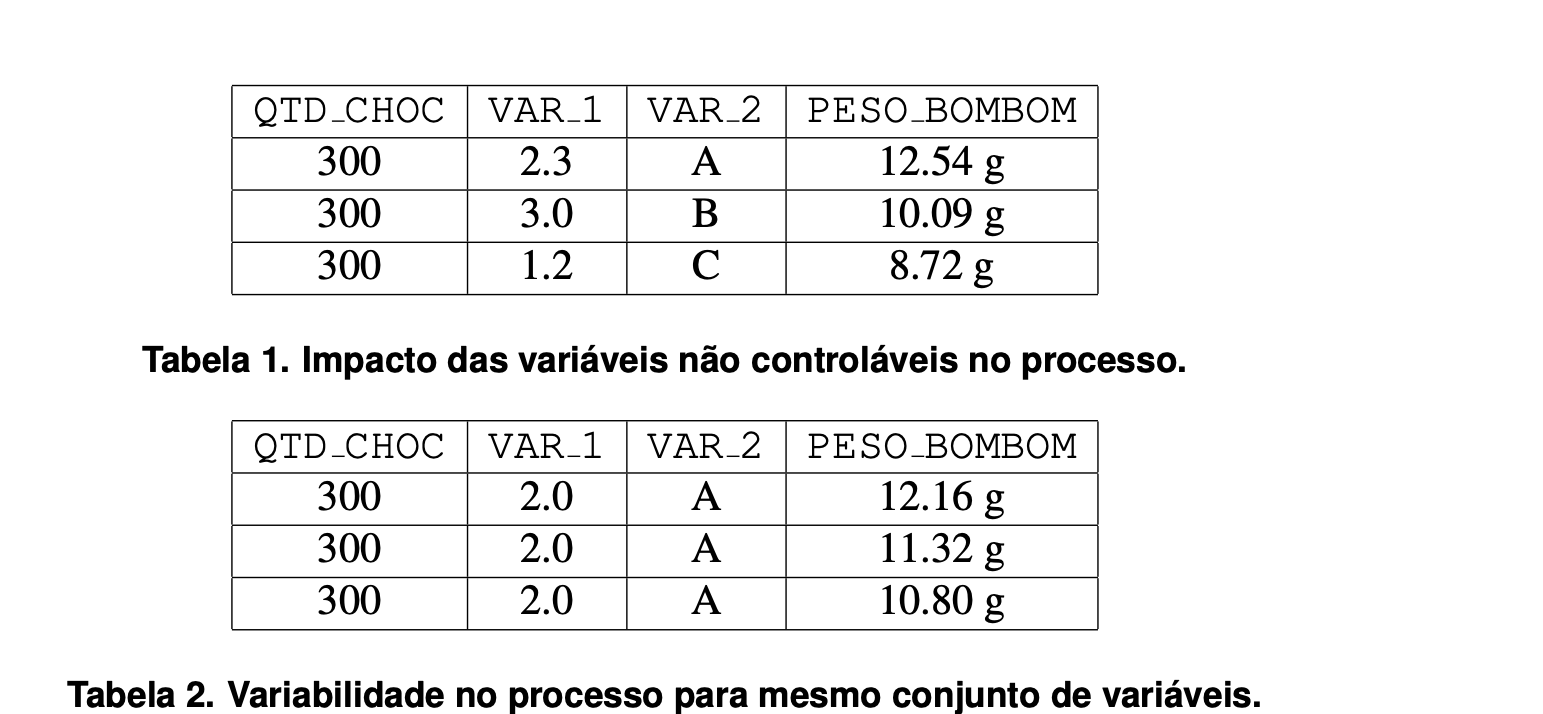



---
O cliente ilustrou o problema através dessa tabela , e a tabela nos mostra a frequência com que o número 300 aparece na variavél de entrada que é a quantidade de chocolate e resulta em uma variedade de  pesos dos bombons , e também em outras variavéis sendo que a quantidade de chocolate é a mesma (300) . 

No gráfico acima da tabela ilustra uma distribuição anormal na variavél (Quantidade de chocolate )  300 .

# Análise minuciosa da variavél peso do bombom

<ipython-input-136-59cc3496068c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PESO_BOMBOM'])


<Axes: xlabel='PESO_BOMBOM', ylabel='Density'>

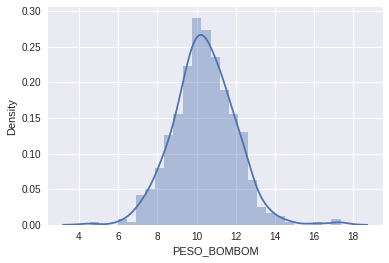

In [ ]:
sns.distplot(df['PESO_BOMBOM'])

O peso dos bombons tem uma distribuição em dez

---

# Distribuição dos bombons em cada categoria da VAR_2

<ipython-input-137-95c12bc8bdb6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.VAR_2== "A"]['PESO_BOMBOM'])


<Axes: xlabel='PESO_BOMBOM', ylabel='Density'>

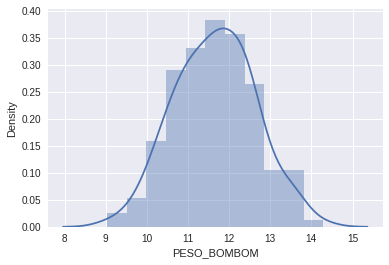

In [ ]:
sns.distplot(df[df.VAR_2== "A"]['PESO_BOMBOM'])

distribuição entre 11, e 12.

<ipython-input-138-fb9bb19362e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.VAR_2== "B"]['PESO_BOMBOM'])


<Axes: xlabel='PESO_BOMBOM', ylabel='Density'>

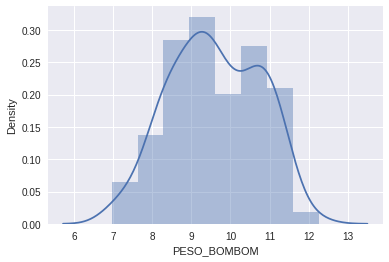

In [ ]:
sns.distplot(df[df.VAR_2== "B"]['PESO_BOMBOM'])

disstribuição entre 8, 9

<ipython-input-139-997381f199b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.VAR_2== "C"]['PESO_BOMBOM'])


<Axes: xlabel='PESO_BOMBOM', ylabel='Density'>

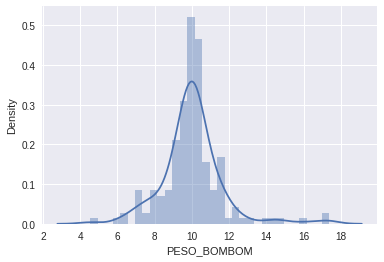

In [ ]:
sns.distplot(df[df.VAR_2== "C"]['PESO_BOMBOM'])

distribuição 10

# QUAL É  O PESO MÁXIMO DOS BOMBONS?

In [ ]:
df['PESO_BOMBOM'].max()


17.3627283203053

# QUANTOS BOMBONS POSSUEM ESSE PESO?

In [ ]:
df['PESO_BOMBOM'].value_counts().max()

1

# QUANTOS BOMBONS POSSUEM VALORES ÚNICOS ?

In [ ]:
df['PESO_BOMBOM'].nunique()

500

 *Através dessa análise acima ficou notório a variabilidade dos pesos , sendo que temos 500 bombons e todos os bombons possuem pesos únicos. Ou seja 500 pesos diferentes.*







---

# Distribuição da variavél 1 por categorias da variavél 2

<ipython-input-143-3f9e02ff77ba>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.VAR_2== "A"]['VAR_1'])


<Axes: xlabel='VAR_1', ylabel='Density'>

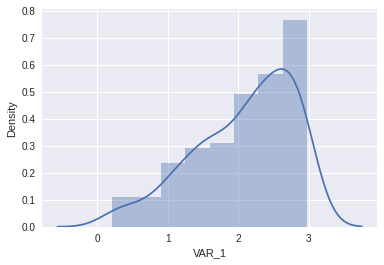

In [ ]:
sns.distplot(df[df.VAR_2== "A"]['VAR_1'])

<ipython-input-144-270599d96d2a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.VAR_2== "B"]['VAR_1'])


<Axes: xlabel='VAR_1', ylabel='Density'>

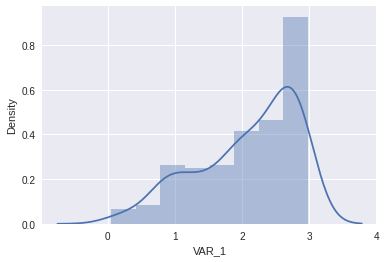

In [ ]:
sns.distplot(df[df.VAR_2== "B"]['VAR_1'])

<ipython-input-145-bc87cf9e1287>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.VAR_2== "C"]['VAR_1'])


<Axes: xlabel='VAR_1', ylabel='Density'>

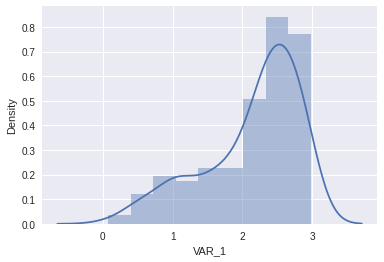

In [ ]:
sns.distplot(df[df.VAR_2== "C"]['VAR_1'])

# Plotagens de dispersão entre as variavéis 

Text(0.5, 1.0, 'DISPERSÃO ENTRE O PESO DO BOMBOM , VARIAVÉL 1 E VARIAVÉL 2 ')

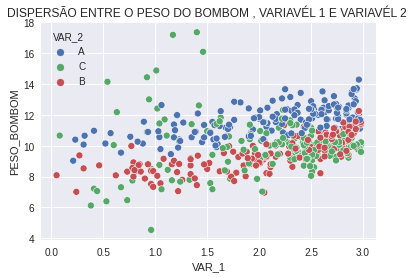

In [ ]:
ax = sns.scatterplot( x= df.VAR_1, y= df.PESO_BOMBOM, hue= df['VAR_2'])
ax.set_title('DISPERSÃO ENTRE O PESO DO BOMBOM , VARIAVÉL 1 E VARIAVÉL 2 ')

É notório que a categoria A possui muitos bombons acima do
peso o que gera um autocusto de produção, enquanto a variável
B tem muitos bombons abaixo do peso e que são descartados

Text(0.5, 1.0, 'DISPERSÃO ENTRE A QUANTIDADE DE CHOCOLATE, VARIAVÉL 1 E VARIAVÉL 2 ')

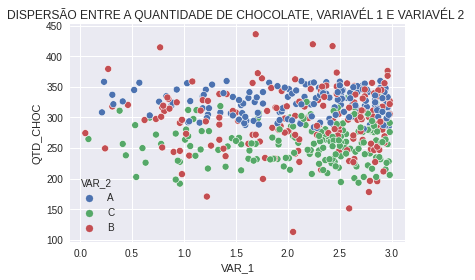

In [ ]:
ax = sns.scatterplot( x= df.VAR_1, y= df.QTD_CHOC, hue= df['VAR_2'])
ax.set_title('DISPERSÃO ENTRE A QUANTIDADE DE CHOCOLATE, VARIAVÉL 1 E VARIAVÉL 2 ')

Através da visualização é possível afirmar que a variável da
categoria B é a que mais utiliza chocolate para a fabricação dos
bombons , sendo que essa categoria é a categoria dos bombons
abaixo do peso .

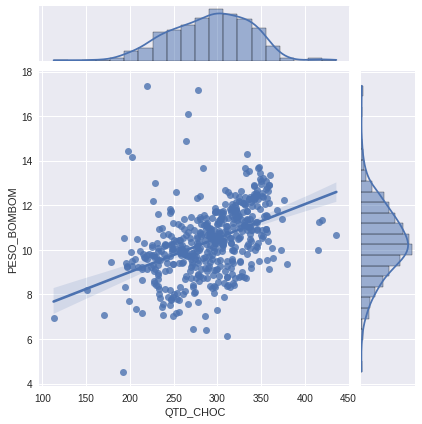

In [ ]:
ax=sns.jointplot(x='QTD_CHOC',y='PESO_BOMBOM',data=df, kind='reg')


O PESO dos bombons  tem uma relação fraca , porém é uma relação positiva aos valores da quantidade de chocolate. Além disso, a linha de regressão é representada ilustrando a correlação entre elas.

Existe alguns valores dispersos 

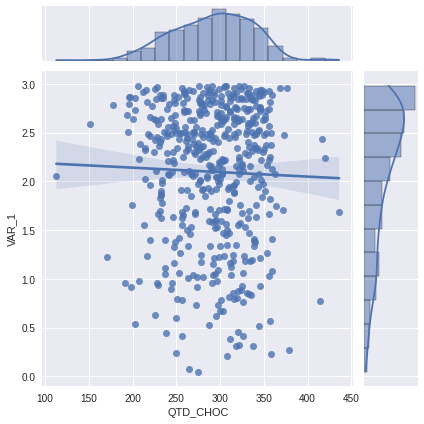

In [ ]:
ax=sns.jointplot(x='QTD_CHOC',y='VAR_1',data=df, kind='reg')

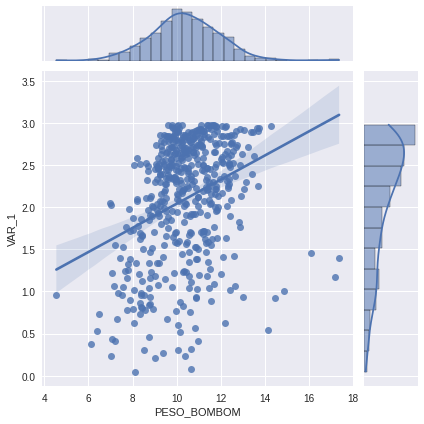

In [ ]:
ax=sns.jointplot(x='PESO_BOMBOM',y='VAR_1',data=df, kind='reg')

correlação negativa

---



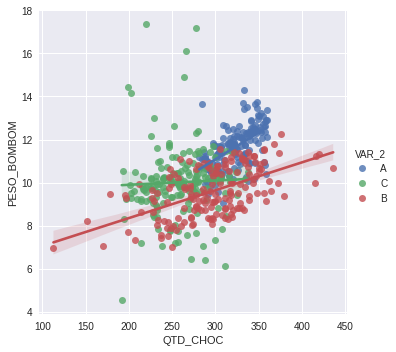

In [ ]:
sns.lmplot(x='QTD_CHOC',y='PESO_BOMBOM',data=df,hue='VAR_2')

Valores dispersos da VAR_2 categoria C acima e abaixo do peso ,
quantidade de chocolate se concentra em 300.
já a categoria A tem uma concentração na quantidade de chocolate
inicial em 300 e chega próximo aos 400 . A categoria B ultrapassa a quantidade de 400 , tem valores dispersos
entre 6, 7, 8 variavél peso , e alguns valores dispersos entre 430 , e 450
na quantidade de chocolate .



---


Em Suma , Através da análise descritiva foi possível obter algumas informações 



sendo elas ; a VAR_2 está categorizada em três categorias , A,B ,C , cada uma corresponde a uma quantidade de bombons 
a categoria A representa 158 bombons , A categoria B é composta por 165 bombons 
e a categoria C 177 bombons .


---


A categoria A é composta por bombons que  extrapolam do peso ideal 10 
A categoria B é composta por bombons que tem o peso abaixo do ideal 10
A categoria C é composta por bombons que possui o peso ideal  (porém a valores disoersos que ultrapassam o peso ideal , chegando a 17 e também bem abaixo do peso .)

---



Ficou claro também a variabilidade desse processo industrial , sendo que temos 500 bombons e todos eles possuem pesos diferentes com uma grande concentração da quantidade de chocolate em 300 , independente do peso .

---

A categoria B possuem bombons bem abaixo do peso , porém através do gráfico de dispersão ficou notório valores  dispersos da quantidade de chocolate acima das outras duas variavéis .

# ANÁLISE DIAGNÓSTICA 

---

# IDENTIFICANDO O PROBLEMA DE NEGÓCIO

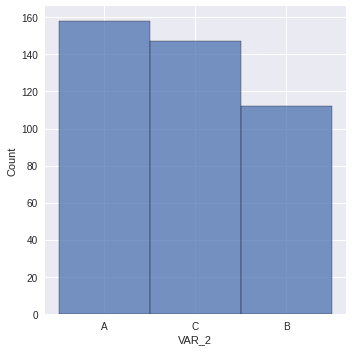

In [ ]:
sns.displot(df[df.PESO_BOMBOM>=9].VAR_2)
#sns.countplot(df[df.PESO_BOMBOM>=9].VAR_2)

A categoria A é onde se concentra o maior indice de bombons que não foram  foram descartados, porém é válido ressaltar que essa categoria tem o maior indice de bombons  que ultrapassem o peso ideal .

In [ ]:
total_categoria = df.VAR_2.value_counts()
total_categoria

C    177
B    165
A    158
Name: VAR_2, dtype: int64

In [ ]:
total = df.VAR_2.value_counts().sum()
categoria_a = total_categoria[2]
categoria_b = total_categoria[1]
categoria_c = total_categoria[0]
porcent_a = (categoria_a *100)/total
porcent_b = (categoria_b *100)/total
porcent_c = (categoria_c *100)/total
print('categoria A {}%  porcetagem de produção baixo custo sobre o total de bombons produzidos.'.format(porcent_a))
print('categoria B {}%  porcetagem de produção baixo custo sobre o total de bombons produzidos.'.format(porcent_b))
print('categoria C {}%  porcetagem de produção baixo custo sobre o total de bombons produzidos.'.format(porcent_c))

categoria A 31.6%  porcetagem de produção baixo custo sobre o total de bombons produzidos.
categoria B 33.0%  porcetagem de produção baixo custo sobre o total de bombons produzidos.
categoria C 35.4%  porcetagem de produção baixo custo sobre o total de bombons produzidos.


A categoria C é a categoria que mais tem porcetagem de baixo custo , e é a categoria que tem os bombons do peso ideal .

# QUANTO ESSA PRODUÇÃO DE BOMBONS REPRESENTA NESSAS CATEGORIAS

In [ ]:
custo=df[(df.PESO_BOMBOM>10)|(df.PESO_BOMBOM<9)].VAR_2.value_counts()
total_custo= custo.sum()

In [ ]:
custo_A = (custo[0]*100/total_categoria[2])
custo_B = (custo[2]*100/total_categoria[1])
custo_C = (custo[1]*100/total_categoria[0])

print(' custo elevado da categoria A, representa {}% no total de produção de bombons desta categoria'.format(custo_A))

print(' custo elevado da categoria B, representa {}% no total de produção de bombons desta categoria'.format(custo_B))

print(' custo elevado da categoria C, representa {}% no total de produção de bombons desta categoria'.format(custo_C))


 custo elevado da categoria A, representa 96.20253164556962% no total de produção de bombons desta categoria
 custo elevado da categoria B, representa 67.87878787878788% no total de produção de bombons desta categoria
 custo elevado da categoria C, representa 66.66666666666667% no total de produção de bombons desta categoria


Vale salientar, que a categoria A é a categoria que tem menos bombons sendo 158 e a categoria que ultrapassa o peso ideal de 10.
A categoria C é a categoria que mais fábrica bombons sendo 177 bombons , e a categoria que contribui para o peso ideal , e a categoria B representa os bombons abaixo do peso e consequetemente , são descartados . entretanto , tem uma grande porcetagem nos custos sendo 67%.



---

# QUAL É A INFLUÊNCIA DA QUANTIDADE DE CHOCOLATE NO PESO FINAL DOS BOMBONS ?

*Abaixo irei plotar um gráfico de calor para visualizar a correlação*

,QTD_CHOC,VAR_1,PESO_BOMBOM
QTD_CHOC,1.000000,-0.029062,0.437217
VAR_1,-0.029062,1.000000,0.316657
PESO_BOMBOM,0.437217,0.316657,1.000000


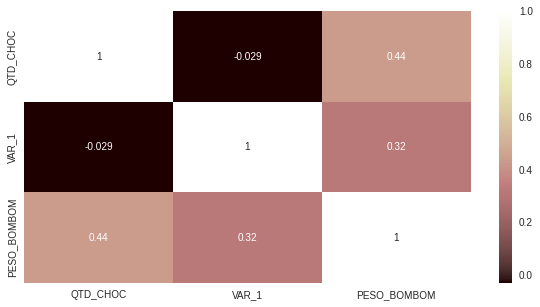

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="pink",annot=True)
c


Tem uma relação positiva fraca .

---

E se eu for mais específica ...


In [ ]:
df[(df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)].corr()

,QTD_CHOC,VAR_1,PESO_BOMBOM
QTD_CHOC,1.000000,0.172933,0.451612
VAR_1,0.172933,1.000000,0.404161
PESO_BOMBOM,0.451612,0.404161,1.000000


Dessa maneira aumentou um pouco a correlação em ambas as variavéis .

## QUAL É O IMPACTO DA VAR_1 NA PRODUÇÃO DOS BOMBONS DA CATEGORIA A QUE MAIS POSSUEM ALTO CUSTO?

In [ ]:
custo_elevado = (df.PESO_BOMBOM<9)|(df.PESO_BOMBOM>10)

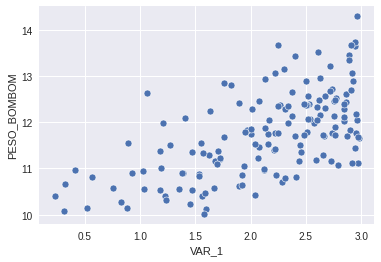

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado & (df.VAR_2=='A')].VAR_1,y=df[custo_elevado & (df.VAR_2=='A')].PESO_BOMBOM)

É possível observar á maneira que o peso dos bombons aumentam , a VAR_1 também vai aumentando.
Baseaado no gráfico acima é possível afirmar que a VAR_1 influencia para um bombom acima do peso .

---

# AGORA IREI OBSERVAR O COMPORTAMENTO DA VARIAVÉL 1 NAS OUTRAS CATEGORIAS.

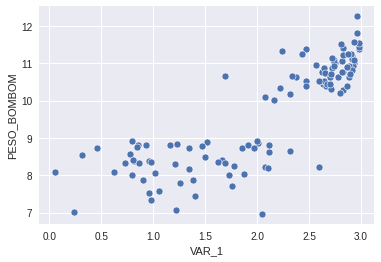

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado & (df.VAR_2=='B')].VAR_1,y=df[custo_elevado & (df.VAR_2=='B')].PESO_BOMBOM)

Lembrando que a categoria B corrobora para bombons de baixo peso , porém , novamente a VAR_1 tem uma relação com o aumento de peso , ou seja os bombons concentrados em 2.9 aumentam o seu peso .

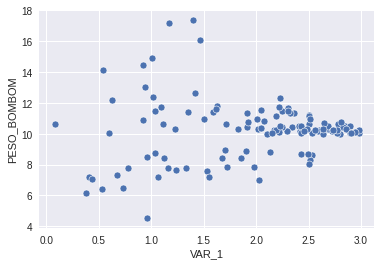

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado & (df.VAR_2=='C')].VAR_1,y=df[custo_elevado & (df.VAR_2=='C')].PESO_BOMBOM)

Essa categoria (C) é composta pelos bombons do peso ideal , diferente dos outros dois gráficos plotados acima a VAR_1 não aumenta conforme o peso vai aumentando . O peso se concentra entre 10 e 11 e aglomera próximo a 2.9 da VAR_1.

# QUAL SERÁ A RELAÇÃO DA QUANTIDADE DE CHOCOLATE E O PESO DOS BOMBONS ?

---

*Abaixo irei visualizar a relação entre a quantidade de chocolate e o peso dos bombons por categorias .*

In [ ]:
custo_elevado_qtd_chocolate = (df.QTD_CHOC<9)|(df.QTD_CHOC>10)

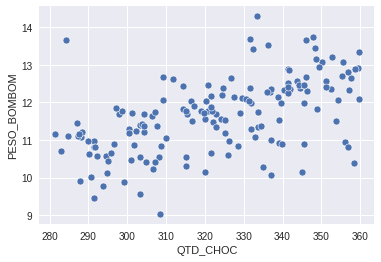

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado_qtd_chocolate & (df.VAR_2=='A')].QTD_CHOC,y=df[custo_elevado_qtd_chocolate & (df.VAR_2=='A')].PESO_BOMBOM)


*Não há correlação, outlier no canto inferior esquerdo e direito*

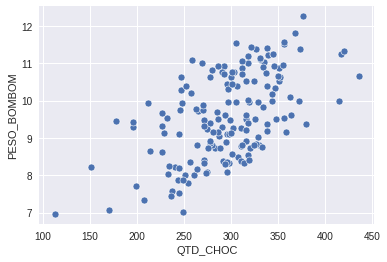

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado_qtd_chocolate & (df.VAR_2=='B')].QTD_CHOC,y=df[custo_elevado_qtd_chocolate & (df.VAR_2=='B')].PESO_BOMBOM)

outlier inferior direito, A categoria B é a categoria que produz bombons abaixo do peso , bombons esses que são descartados , através do gráfico é possível ver que é a categoria que mais utiliza chocolate, Há uma leve correlação .

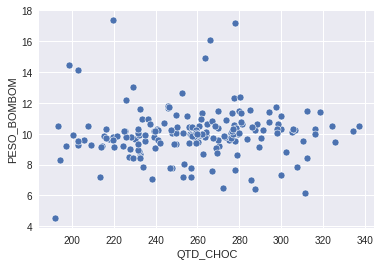

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado_qtd_chocolate & (df.VAR_2=='C')].QTD_CHOC,y=df[custo_elevado_qtd_chocolate & (df.VAR_2=='C')].PESO_BOMBOM)

outlier inferior direito e esquerdo, correlação nula 

---
# QUANDO AUMENTA A QUANTIDADE DE CHOCOLATE AUMENTA O NÍVEL DA VAR_1?


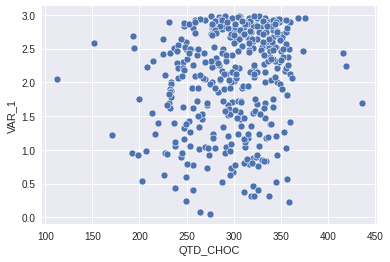

In [ ]:
ax = sns.scatterplot(x = df[custo_elevado].QTD_CHOC,y=df[custo_elevado].VAR_1)


Há alguns outliers , e sim quanto maior a quantidade de chocolate maior é o nível da VAR_1

# Visualizando a distribuição das variavéis

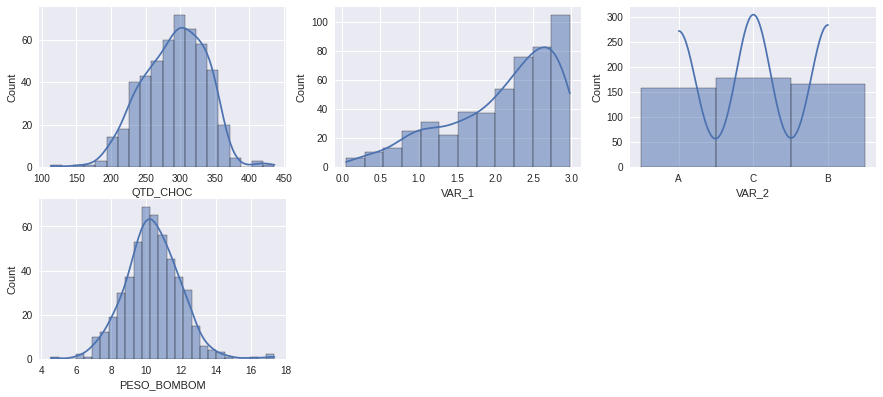

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)


# Principais insights que sintetizam a análise diagnóstica 
**RECOMENDAÇÃO**

Em síntese, A categoria( A )é a que mais produz bombons de alto custo, a análise acima elucidou que a
quantidade de chocolate utilizada tem uma relação forte positiva com o peso do bombom, conforme a
quantidade de chocolate aumenta, o peso do bombom aumenta também, isso está gerando um alto
custo de produção, além disso a quantidade de chocolate utilizada é muito maior do que é usada em
outras categorias. A recomendação é diminuir a quantidade de chocolate utilizada. Se faz necessário também
o controle do nível de valores entre a variável 1 e a quantidade de chocolate utilizada.
Através das análises é possível afirmar que conforme aumenta o valor da (variável 1) a quantidade de
chocolate precisa ser baixa, e se a quantidade de chocolate for alta, o nível da variável 1 precisa ser
baixa.
Exemplificando: Para bombons em que a quantidade de chocolate é de (200), pode-se usar como nível da (variavél 1) 3.0 ou 2.9
 porém , em casos que a quantidade de chocolate é maior que 350 precisa-se usar um nível da (variável 1) menor que 1.0.



---


# PRÉ-PREPARAÇÃO DOS DADOS PARA ANÁLISE PREDITIVA 

---



**NORMALIZANDO A DISTRIBUIÇÃO DA VARIAVÉL QTD_CHOC**

<ipython-input-169-34119f1b1cfb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['QTD_CHOC'] , fit=norm);



 mu = 291.26460 and sigma = 45.13729



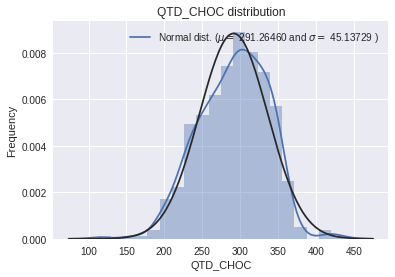

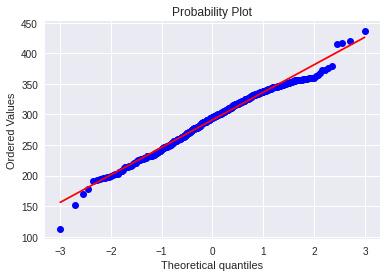

In [ ]:
sns.distplot(df['QTD_CHOC'] , fit=norm);

# Obtendo os parâmetros ajustados usados pela função
(mu, sigma) = norm.fit(df['QTD_CHOC'])
print( '\n mu = {:.5f} and sigma = {:.5f}\n'.format(mu, sigma))

# traçando a distribuição
plt.legend(['Normal dist. ($\mu=$ {:.5f} and $\sigma=$ {:.5f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('QTD_CHOC distribution')

#plotando o gráfico 
fig = plt.figure()
res = stats.probplot(df['QTD_CHOC'], plot=plt)
plt.show()

In [ ]:
import matplotlib.ticker as ticker
def prob_plot(tq_var1, tq_var2):

    plt.subplot(2, 2, 1)
    tq_var1_hist = sns.histplot(
      df[tq_var1], kde=True, color="#03396c", line_kws={"lw": 2}
    )
    tq_var1_hist.xaxis.set_major_formatter(ticker.EngFormatter())
    tq_var1_hist.set_title("(" + tq_var1 + ") " + "Distributions", fontsize=10)
   
    ax = plt.subplot(2, 2, 2)
    stats.probplot(df[tq_var1], plot=plt)
    ax.get_lines()[0].set_marker("o")
    ax.get_lines()[0].set_markerfacecolor("#343d46")
    ax.get_lines()[0].set_markeredgecolor("#343d46")
    ax.get_lines()[0].set_markersize(5.0)
    ax.get_lines()[1].set_color("#f01c58")
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.set_title("Probability Plot " + "(" + tq_var1 + ")", fontsize=10)
   
    plt.subplot(2, 2, 3)
    tq_var1_hist = sns.histplot(
        df[tq_var2], kde=True, color="#03396c", line_kws={"lw": 2}
    )
    tq_var1_hist.xaxis.set_major_formatter(ticker.EngFormatter())
    tq_var1_hist.set_title("(" + tq_var2 + ") " + "Distributions", fontsize=10)
   
    ax = plt.subplot(2, 2, 4)
    stats.probplot(df[tq_var2], plot=plt)
    ax.get_lines()[0].set_marker("o")
    ax.get_lines()[0].set_markerfacecolor("#343d46")
    ax.get_lines()[0].set_markeredgecolor("#343d46")
    ax.get_lines()[0].set_markersize(5.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.get_lines()[1].set_color("#f01c58")
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.set_title("Probability Plot " + "(" + tq_var2 + ")", fontsize=10)

    plt.tight_layout(pad=1)
    shapiro_test_tq_var1 = stats.shapiro(df[tq_var1])
    shapiro_test_tq_var2 = stats.shapiro(df[tq_var2])
    return print("(" + tq_var1 + ")--->", shapiro_test_tq_var1), print(
        "(" + tq_var2 + ")--->", shapiro_test_tq_var2
    )



(QTD_CHOC)---> ShapiroResult(statistic=0.9876503348350525, pvalue=0.00030917575350031257)
(PESO_BOMBOM)---> ShapiroResult(statistic=0.9864102602005005, pvalue=0.0001293691311730072)


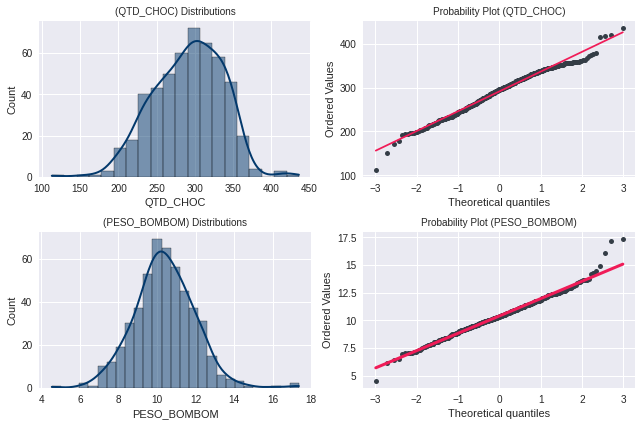

In [ ]:
plt.figure(figsize=(9, 6))
prob_plot("QTD_CHOC", "PESO_BOMBOM")
plt.show()

In [ ]:
#Visualizando o segundo dataset
display(df_2)

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,286.63,2.72,A,NaN
1,257.27,1.97,B,NaN
2,353.16,2.64,A,NaN
3,317.78,2.76,A,NaN
4,248.10,2.63,C,NaN
5,301.79,0.93,A,NaN
6,246.52,2.98,B,NaN
7,356.48,2.38,A,NaN
8,349.41,1.59,B,NaN
9,282.74,2.11,C,NaN


# VISUALIZANDO OS VALORES NULOS

<Figure size 720x432 with 0 Axes>

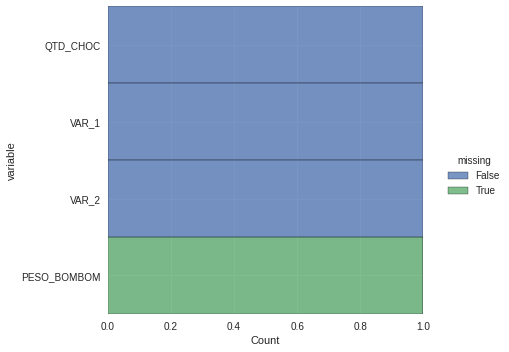

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
#visualizando os valores nulos numericamente 
print("Valores nulos Summary\n{}".format("-"*35))
print(df_2.isnull().sum(axis = 0))
     

Valores nulos Summary
-----------------------------------
QTD_CHOC        0
VAR_1           0
VAR_2           0
PESO_BOMBOM    50
dtype: int64


In [ ]:
#df['PESO_BOMBOM'] = df_2['PESO_BOMBOM'].fillna(df_2['PESO_BOMBOM'])
#print(df_2)

In [ ]:
pd.concat([df, df_2])
df3 = pd.concat([df, df_2])
print('********\n', df3)

********
     QTD_CHOC  VAR_1 VAR_2  PESO_BOMBOM
0     320.15   0.88     A    10.144919
1     320.14   1.55     A    11.547027
2     284.85   2.97     A    11.112109
3     263.92   2.36     C     9.900123
4     276.22   2.98     C    10.079822
..       ...    ...   ...          ...
45    296.03   1.79     B          NaN
46    359.62   2.81     A          NaN
47    266.98   1.23     B          NaN
48    387.76   2.38     B          NaN
49    316.11   1.34     B          NaN

[550 rows x 4 columns]


**há** 100% de dados faltantes na variavél PESO_BOMBOM.
Irei fazer uma imputação

In [ ]:
#Preenchendo os valores nulos com a média de peso do df
#df3["PESO_BOMBOM"].fillna("Average", inplace=True)
#print(df3)

In [ ]:
#Preenchendo os valores nulos com a mediana de peso do df
df3["PESO_BOMBOM"] = df3["PESO_BOMBOM"].replace(np.NaN, df3["PESO_BOMBOM"].median())
print(df3["PESO_BOMBOM"][:10])

0    10.144919
1    11.547027
2    11.112109
3     9.900123
4    10.079822
5    11.754616
6     8.722600
7     9.607203
8     9.036513
9    10.552263
Name: PESO_BOMBOM, dtype: float64


In [ ]:
#visualizando os valores nulos
df3.isna().sum()

QTD_CHOC       0
VAR_1          0
VAR_2          0
PESO_BOMBOM    0
dtype: int64

In [ ]:
#importando as bibliotecas
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
enc = OneHotEncoder(sparse=False)
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [ ]:
#transformando a var_2
def pre_processing(dataframe, coluna):
   
    x = pd.DataFrame(enc.fit_transform(dataframe[[coluna]]))
    dataframe = dataframe.join(x)
    return dataframe

In [ ]:
df_processing = pre_processing(df3,'VAR_2')
df_processing.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM,0,1,2
0,320.15,0.88,A,10.144919,1.0,0.0,0.0
0,286.63,2.72,A,10.334273,1.0,0.0,0.0
1,320.14,1.55,A,11.547027,1.0,0.0,0.0
1,257.27,1.97,B,10.334273,1.0,0.0,0.0
2,284.85,2.97,A,11.112109,1.0,0.0,0.0


In [ ]:
df_processing.columns

Index(['QTD_CHOC', 'VAR_1', 'VAR_2', 'PESO_BOMBOM', 0, 1, 2], dtype='object')

In [ ]:
#dividindo o conjunto de dados
X = df_processing[['QTD_CHOC','VAR_1']]
y = df_processing['PESO_BOMBOM']
X_train, X_test, Y_train, Y_test,  = train_test_split(X,y, test_size=0.3, random_state=2811)

   


In [ ]:
#visualizando a proporção
X_test.shape

(165, 2)

In [ ]:
X_train.shape

(385, 2)

O algoritmo escolhido foi a regressão linear. A regressão linear é um
algoritmo de aprendizado supervisionado que oferece suporte para
encontrar a correlação linear entre as variáveis. O resultado ou saída
do problema de regressão é um valor real ou contínuo.
O objetivo do algoritmo de regressão linear é obter os melhores
valores para B 0 e B 1 para encontrar a melhor linha de ajuste. A linha
de melhor ajuste é uma linha que tem o menor erro, o que significa
que o erro entre os valores previstos e os valores reais deve ser
mínimo.

In [ ]:
#regressão linear
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(4.784031855239119, array([0.01432373, 0.67837641]))

In [ ]:
index = ['Intercept','QTD_CHOC','VAR_1']
pd.DataFrame(data=np.append(lin_reg.intercept_,lin_reg.coef_), index=index,columns=['Parametros'])


,Parametros
Intercept,4.784032
QTD_CHOC,0.014324
VAR_1,0.678376




*  



In [ ]:
intercept = lin_reg.intercept_
print(f'Coeficiente de interceptação: {intercept:.4f}')
# imprimindo o coeficiente de inclinação da reta
slope = lin_reg.coef_
print(f'Coeficiente de inclinação:    {slope.round(4)}')

Coeficiente de interceptação: 4.7840
Coeficiente de inclinação:    [0.0143 0.6784]


In [ ]:
y_pred_model = lin_reg.predict(X)
print(y_pred_model)

[ 9.96674587 10.73482698 10.42111483  9.8054999  10.87892484 11.63351475
 10.16531952 11.20814628 10.7620948  10.12187971 10.92147344  9.73768097
 10.09536586 10.33667996 10.30310223 11.50469167  9.70713811 10.86750552
 10.65559991 10.26529805 10.47881663 10.94030185 10.94342465  9.87539335
 11.32448453 10.13371156 10.58386609  9.87278254 10.07818862 10.29325998
 11.32928804 10.6464821  10.45204473 10.10967388 11.48424351  9.78492981
 10.89960674 10.58788867  9.54911481 10.28713221 11.68005005 11.36126062
 11.43329328 10.38087897 11.04328949 10.51796232  9.67407836 10.49890988
 11.19424179  8.64540367 10.62748014 10.57638967 11.48802153  9.77443235
 10.67350457 10.65242438  9.73996229 10.62523436  9.65112073 11.3090149
  9.90091614 11.04895689  9.42915973  9.69917779  8.63065323 10.61005044
 11.35786406  9.29811295 12.17663777 10.05086766 11.43484982 10.83911387
  9.45129419 10.66076581 10.08736776  9.44784379 10.36103966 12.16026793
 11.37806876 11.00365689  9.786348   10.62445197 11.

In [ ]:
# imprimindo o coeficiente de determinação
r_squared = lin_reg.score(X, y)
print(f'Coeficiente de Determinação: {r_squared}')

Coeficiente de Determinação: 0.2768525511682235


In [ ]:
y_predict_train = lin_reg.predict(X_test)

Text(0, 0.5, 'Peso do chocolate - Real')

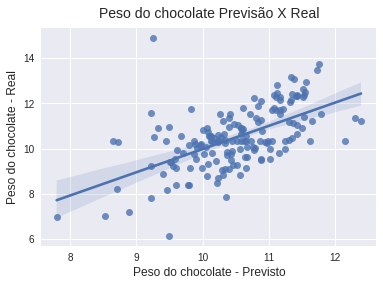

In [ ]:
ax = sns.regplot(x = y_predict_train,y= Y_test)
ax.set_title('Peso do chocolate Previsão X Real', fontsize=14, y=1.02)
ax.set_xlabel("Peso do chocolate - Previsto", fontsize=12)
ax.set_ylabel("Peso do chocolate - Real", fontsize=12)


o resultado da predição dos pesos foi boa , o erro foi bem baixo . Porém dar para melhorar utilizando uma regressão lasso que é a regularização da regressão linear.

In [ ]:
MSE = metrics.mean_squared_error(Y_test,y_predict_train).round(2)
print('Valor do MSE (Mean square Error): {}'.format(MSE))


Valor do MSE (Mean square Error): 1.19


In [ ]:
print("R quadrado = {}".format(lin_reg.score(X_train,  Y_train).round(2)))

R quadrado = 0.25


In [ ]:
r_squared = lin_reg.score(X, y) 
print(f'Coeficiente de Determinação: {r_squared}')

Coeficiente de Determinação: 0.2768525511682235


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict



<bound method LinearModel.predict of Lasso(alpha=0.1)>